[[-0.15523542]
 [ 0.3672522 ]]
[[ 0.15523542]
 [-0.3672522 ]]
part 1
0.8047520021215919
0.636144438799629
0.052029174879416454
0.04005585870356021
0.010326963863255056
0.00802776008333263
0.00012725792425818635
0.0001127082329077622
4.2932919307579986e-08
3.9186841118814295e-08
5.534154767702547e-15
5.116908361049724e-15
Method converge after 6th iterations
[5.99999897 0.99999994]
-------------------------------------------------
Part 2
-----------------------------------------
gamma = 5e-2
0.8047520021215919
0.6400281286203239
0.04261735831795499
0.03302327217503825
0.022932928095993628
0.01709992386981898
0.0010422930591207176
0.0009339586614793312
0.00048526293458722085
0.0004860360888693321
0.00048564943077542336
0.0004854561624433043
0.0004853595434557808
0.00048531123775663376
0.0004852870858557109
0.00048527501014241205
0.00048526897234505323
0.00048526595346119907
0.0004852644440229734
0.000485263689304788
0.00048526331194592844
0.00048526312326655814
0.0004852630289268811
0.00

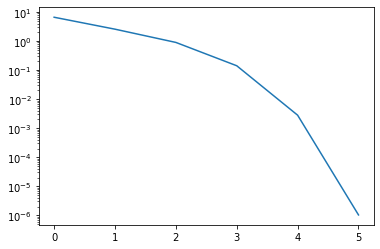

----------------------------------------
gamma = 1e-1
0.8047520021215919
0.6439125169843624
0.035068247507318275
0.027355045171479648
0.04383696076280393
0.03127114830758965
0.0031971121979507845
0.002917570827353523
0.0019517215984857553
0.0019590497809773484
0.001955383870138381
0.001953552279429163
0.0019526368252386554
0.001952179183432736
0.0019519503838519082
0.0019518359893920022
0.0019517787934946694
0.001951750195879155
0.001951735897154695
0.0019517287478132837
0.0019517251731477744
0.0019517233858163281
0.001951722492150928
0.0019517220453183148
0.0019517218219020252
0.001951721710193893
0.0019517216543398208
0.0019517216264127743
0.0019517216124492684
0.0019517216054675103
0.001951721601976629
0.0019517216002311922
0.001951721599358472
0.0019517215989221105
0.0019517215987039337
0.0019517215985948363
0.0019517215985402942
0.0019517215985130297
0.0019517215984993811
0.0019517215984925734
0.001951721598489165
0.0019517215984874478
0.0019517215984866056
0.001951721598486174
0.

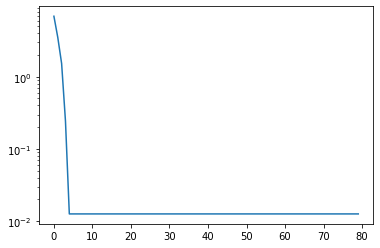

------------------------------------------------
gamma = 1e-3
0.8047520021215919
0.6362221032197363
0.05182131574748918
0.039901345656760824
0.010510575826052028
0.008163271138023426
0.00013381520315031083
0.00011799745136695046
3.144721266484761e-07
2.953512844295657e-07
1.93753344251244e-07
1.9376164001146372e-07
1.9375749210880304e-07
1.9375541817439396e-07
1.9375438121145734e-07
1.9375386273096638e-07
1.9375360349100572e-07
1.9375347387106912e-07
1.9375340906111695e-07
1.937533766562276e-07
1.9375336045374254e-07
1.9375335235250487e-07
1.9375334830185538e-07
1.937533462765787e-07
1.9375334526388333e-07
1.937533447575929e-07
1.9375334450438274e-07
1.937533443778415e-07
1.9375334431459852e-07
1.9375334428288646e-07
1.937533442670295e-07
1.9375334425917406e-07
1.9375334425523268e-07
1.9375334425321847e-07
1.9375334425228318e-07
1.937533442517101e-07
1.9375334425153287e-07
1.9375334425138136e-07
1.937533442513391e-07
1.93753344251244e-07
Method converge after 6th iterations
[5.99979894

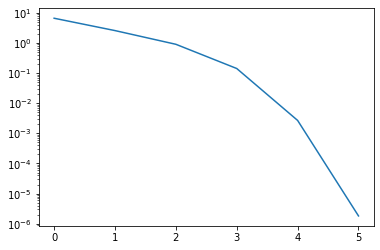

In [3]:
#Saurav Adhikari - 1622912
#Lalita Awasthi - 1622924
#Nila Ravindran - 1614113

import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt


def sigmoidal(t):
	return 1/(1 + np.exp(-t))


def dsigmoidal(t):
	s = sigmoidal(t)
	return s * (1 - s)


def generate_data(gamma=0.0):
	np.random.seed(99)
	n = 10
	t = np.random.rand(n) - 0.5
	noise = np.random.randn(n)*gamma
	signal = sigmoidal(t*6. + 1.)
	alpha = signal + noise
	return t, alpha


def plot(x, gamma):
	t, alpha = generate_data(gamma)
	t_axis = np.linspace(-3, 3, 50)
	plt.scatter(t, alpha)
	plt.plot(t_axis, sigmoidal(t_axis*x[0] + x[1]))
	plt.show()


def convergence_plot(delta_x_list):
	plt.plot(delta_x_list)
	plt.yscale("log")
	plt.show()


def armijo(f, x, g, d, rho=0.5, c=0.01, alpha=1, **kwargs):
	"""Armijo line search

	Parameters:
		f: callable, Function to be minimized
		x: ndarray, current iterate x
		g: ndarray, current gradient of f() at x
		d: ndarray, current descent direction, e.g. -g
		rho: [float], scaling factor of stepsize
		c: [float], factor in minimum decrease condition
		alpha: [float], start step size
		**kwargs: [keyword args]
	Returns: float"""
	f_x = f(x)

	gTd = (g.T.dot(d))[0]
	while f(x + alpha*d[:,0]) > f_x + c*alpha*gTd:
		alpha *= rho
	return alpha

t, alpha = generate_data()
# print(t, alpha)


def F(x, gamma=0):
	F_x = np.zeros([10, 1])
	for i in range(0, 10):
		F_x[i] = sigmoidal(x[0]*t[i] + x[1]) - alpha[i] + gamma * eps[i]
	return F_x



def J(x):
	j = np.zeros([10, 2])
	for i in range(0, 10):
		j[i][0] = sigmoidal(x[0]*t[i] + x[1]) * (1 - sigmoidal(x[0]*t[i] + x[1])) * t[i]
	for y in range(0, 10):
		j[y][1] = sigmoidal(x[0]*t[y] + x[1]) * (1 - sigmoidal(x[0]*t[y] + x[1]))
	return j

def f(x):
	F_x = F(x)
	print(0.5 * np.linalg.norm(F_x) ** 2)
	return 0.5 * np.linalg.norm(F_x) ** 2

def Gauss_Newton(x, tol, max_iter, gamma):
    delt = list()
    for i in range(0, max_iter):
        B = np.dot(J(x).T, J(x))
        delt_x = np.linalg.solve(B, -np.dot(J(x).T, F(x, gamma)))
        tau = armijo(f, x, J(x).T.dot(F(x, gamma)), -J(x).T.dot(F(x, gamma)))

        delt.append(np.linalg.norm(delt_x[:,0]))
        if np.linalg.norm(delt_x[:,0]) < tol:
            print(f"Method converge after {i+1}th iterations")
            return x, delt
        x = x + tau*delt_x[:,0]
    print("Method won't converge")
    return x, delt


eps = np.random.randn(10)

x = np.array([1, 2])
print(J(x).T.dot(F(x,gamma=0)))
print(-J(x).T.dot(F(x, gamma=0)))

print("part 1")

#for gamma = 0
gamma = 0
y, delta = Gauss_Newton(x, 1e-4, 80, gamma)
print(y)

print("-------------------------------------------------")

print("Part 2")
print("-----------------------------------------")
print("gamma = 5e-2")
#for gamma = 5e-2
x = np.array([1, 2])
gamma = 5e-2
y, delta = Gauss_Newton(x, 1e-4, 80, gamma)
print(y)
print("------------------------------------------")
print("gamma = 1e-3")
#for gamma = 1e-3
gamma = 1e-3
y, delta = Gauss_Newton(x, 1e-4, 2900, gamma)
print(y)
print("---------------------------------------------")



print("Part 3")
print("-------------------------------------------")

print("gamma = 0")
#for gamma = 0
gamma = 0
y, delta = Gauss_Newton(x, 1e-4, 80, gamma)
print(y)
convergence_plot(delta)
print("----------------------------------------")


print("gamma = 1e-1")
#for gamma = 1e-1
gamma = 1e-1
y, delta = Gauss_Newton(x, 1e-4, 80, gamma)
print(y)
convergence_plot(delta)
print("------------------------------------------------")

#for gamma = 1e-3
print("gamma = 1e-3")
gamma = 1e-3
y, delta = Gauss_Newton(x, 1e-4, 80, gamma)
print(y)
convergence_plot(delta)










